In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [284]:
import warnings
warnings.filterwarnings("ignore") 

In [285]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)

**First we will import the Application Data into a dataframe, and prepare it for analysis. We will drop any columns which have more than 13.5% missing values.**

In [286]:
app_df = pd.read_csv("application_data.csv")
app_df.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**We will first check the basic information about this dataframe, e.g. shape, info etc.**

In [287]:
app_df.shape

(307511, 122)

In [288]:
app_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [289]:
app_df.dtypes.value_counts() 

float64    65
int64      41
object     16
dtype: int64

**We will now check for the percentage of missing values in each column of this dataframe.**

In [290]:
round(100*(app_df.isnull().sum()/len(app_df.index)), 2) 

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**We will now define a function which will drop the columns with more than** <span style="color:'#3acd2f">**13.5%**</span> **missing values.**

In [373]:
def get_top_nulls(df, percentage):
    import io
    buf = io.StringIO()
    df.info(buf=buf, null_counts=True)
    info_str = buf.getvalue().split('\n')[3:][:-3]
    info_df=pd.DataFrame([s.split()[:2] for s in info_str])
    print (info_df.head())
    info_df.columns = ['Field', 'NonNulls']
    info_df.NonNulls = pd.to_numeric(info_df.NonNulls)
    
    drop_cols = list (info_df.loc[info_df.NonNulls < (len(df)*(1-percentage)) , 'Field' ])
    return drop_cols 

**We can see below that this operation will remove** <span style="color:'#ff4545">**51**</span> **columns from the dataframe.**

In [292]:
len(get_top_nulls(app_df)) 

                    0       1
0          SK_ID_CURR  307511
1              TARGET  307511
2  NAME_CONTRACT_TYPE  307511
3         CODE_GENDER  307511
4        FLAG_OWN_CAR  307511


51

**We will now pass the dataframe through our function to create a new dataframe, with not more than** <span style="color:#ff8226">**13.5%**</span> **missing values in any columns.**

In [293]:
app_df_drop = app_df.drop(columns = get_top_nulls(app_df))
app_df_drop.head() 

                    0       1
0          SK_ID_CURR  307511
1              TARGET  307511
2  NAME_CONTRACT_TYPE  307511
3         CODE_GENDER  307511
4        FLAG_OWN_CAR  307511


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
app_df_drop.shape 

(307511, 71)

**Let's inspect the missing value percentages of this new dataframe.**

In [295]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**Let's analyse the columns with missing values. We will start with 'AMT_REQ_CREDIT_BUREAU_HOUR', and inspect this column.**

In [296]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].describe() 

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**Looks like it is column of integers, incorrectly set as floats. Let's analyse it using value counts.**

In [297]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts() 

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

**As 'AMT_REQ_CREDIT_BUREAU_HOUR' is a integer variable, we can't use** <span style="color:'#ff4545">**mean or median**</span> **to impute this. So we will impute by** <span style="color:'#3acd2f">**mode**</span>**, as it covers** <span style="color:#ff8226">**99.40**</span> **of all the available values, and** <span style="color:#ff8226">**85.97**</span> **of all values. Therefore we are imputing NaNs by 0.** 

In [298]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR']), ['AMT_REQ_CREDIT_BUREAU_HOUR']] = 0
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts() 

0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

**Let's inspect the dataframe once again.**

In [299]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**We will now inspect the next 5 variables, and see how we can impute their values**

In [300]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts() 

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [301]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts() 

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [302]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_MON'].value_counts() 

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [303]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts() 

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [304]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts() 

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

**After the inspection, we can see that except the year, the other 4 variables can be safely imputed by 0.**

In [305]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_DAY']), ['AMT_REQ_CREDIT_BUREAU_DAY']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_WEEK']), ['AMT_REQ_CREDIT_BUREAU_WEEK']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_MON']), ['AMT_REQ_CREDIT_BUREAU_MON']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0 

In [306]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**Let's see if we can do something about the 'AMT_REQ_CREDIT_BUREAU_YEAR' column**

In [307]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].describe() 

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**Looks like we can use the** <span style="color:#3acd2f">**median**</span> **for imputing this one.**

In [308]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR']), ['AMT_REQ_CREDIT_BUREAU_YEAR']] = 1

In [309]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

**Let's find out which columns still have missing values.**

In [310]:
app_df_drop.columns[app_df_drop.isnull().any()] 

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

**Since we have only imputed numerical variables so far, we will now impute a categorical variable.**

In [311]:
app_df_drop['NAME_TYPE_SUITE'].value_counts() 

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**We can impute this one with** <span style="color:#3acd2f">**mode**</span>**, as the frequency of maximum occurence is much higher than the rest of the options.**

In [312]:
app_df_drop.loc[pd.isnull(app_df_drop['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = 'Unaccompanied'

In [313]:
app_df_drop['NAME_TYPE_SUITE'].value_counts() 

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [314]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

**We have imputed more than 5 variables with the best metric, and these comprise of both categorical and numerical variables.**
**We willl now check the data types of the remaining columns**

In [315]:
app_df_drop.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

**We can clearly see that the following columns need to be changed into integer data type from float:**
<pre>
CNT_FAM_MEMBERS
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
</pre>

**To avoid running into errors, we will use the fillna option to fill these values with 0.**

In [316]:
app_df_drop = app_df_drop.fillna(0) 

In [317]:
app_df_drop[['CNT_FAM_MEMBERS', 
            'AMT_REQ_CREDIT_BUREAU_HOUR', 
            'AMT_REQ_CREDIT_BUREAU_DAY', 
            'AMT_REQ_CREDIT_BUREAU_WEEK', 
            'AMT_REQ_CREDIT_BUREAU_MON', 
            'AMT_REQ_CREDIT_BUREAU_QRT', 
            'AMT_REQ_CREDIT_BUREAU_YEAR']] = app_df_drop[['CNT_FAM_MEMBERS',
                                                          'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                          'AMT_REQ_CREDIT_BUREAU_DAY',
                                                          'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                          'AMT_REQ_CREDIT_BUREAU_MON',
                                                          'AMT_REQ_CREDIT_BUREAU_QRT',
                                                          'AMT_REQ_CREDIT_BUREAU_YEAR']].astype('int64') 

**Let's check the data types once again:**

In [318]:
app_df_drop.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

**We will now check for outliers and treat them for** <span style="color:#ff8226">**3 numerical variables.**</span>

In [319]:
app_df_drop['AMT_INCOME_TOTAL'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
85%      2.340000e+05
90%      2.700000e+05
95%      3.375000e+05
100%     1.170000e+08
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [320]:
app_df_drop['AMT_CREDIT'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
5%       1.350000e+05
10%      1.800000e+05
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
85%      1.024740e+06
90%      1.133748e+06
95%      1.350000e+06
100%     4.050000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [321]:
app_df_drop['AMT_ANNUITY'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    307511.000000
mean      27107.516051
std       14494.443757
min           0.000000
5%         9000.000000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
85%       40806.000000
90%       45954.000000
95%       53325.000000
100%     258025.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**We can clearly see that if we exclude values beyond the** <span style="color:#ff8226">**95th percentile**</span>**, we can remove the outliers for these columns.**  
**Let's go ahead and do that.**

In [322]:
lo = .00 #.05
hi = .95
app_df_quant = app_df_drop.quantile([lo, hi]) 
app_df_quant[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']] = app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].quantile([lo, hi]) 
app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']] = app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].apply(lambda x: x[(x > app_df_quant.loc[lo,x.name]) & (x <= app_df_quant.loc[hi,x.name])], axis=0) 
app_df_drop.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,293474.000000,2.932470e+05,292159.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,154264.812449,5.467967e+05,25104.804497,5.379095e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152651,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.513289,1.417523,0.142944,1.400626,0.099717,-962.855657,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,64014.287380,3.239815e+05,11301.204541,3.696338e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910695,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.192334,2.398395,0.446033,2.377224,0.361735,826.808966,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,26100.000000,4.797000e+04,1615.500000,0.000000e+00,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,16155.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0

**Let's inspect our newly filtered columns.**

In [323]:
print(app_df_drop['AMT_INCOME_TOTAL'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 
print(app_df_drop['AMT_CREDIT'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 
print(app_df_drop['AMT_ANNUITY'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 

count    293474.000000
mean     154264.812449
std       64014.287380
min       26100.000000
10%       81000.000000
20%       94500.000000
30%      112500.000000
40%      135000.000000
50%      135000.000000
60%      157500.000000
70%      180000.000000
80%      202500.000000
90%      247500.000000
95%      270000.000000
100%     337500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64
count    2.932470e+05
mean     5.467967e+05
std      3.239815e+05
min      4.797000e+04
10%      1.800000e+05
20%      2.476755e+05
30%      2.925000e+05
40%      4.029390e+05
50%      4.950000e+05
60%      5.707395e+05
70%      6.795000e+05
80%      8.307090e+05
90%      1.046142e+06
95%      1.185120e+06
100%     1.350000e+06
max      1.350000e+06
Name: AMT_CREDIT, dtype: float64
count    292159.000000
mean      25104.804497
std       11301.204541
min        1615.500000
10%       10826.100000
20%       14350.500000
30%       17689.500000
40%       21190.500000
50%       24102.000000
6

**We can see that the outliers are gone. Let's examine the data imbalance in this dataset.**

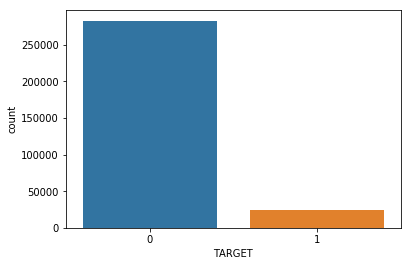

In [324]:
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data = app_df_drop)
plt.show() 

In [325]:
app_df1 = app_df_drop[app_df_drop.TARGET == 1] 
app_df1.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
app_df0 = app_df_drop[app_df_drop.TARGET == 0] 
app_df0.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [327]:
print(app_df0.shape[0]/app_df1.shape[0]) 

11.387150050352467


**So, data imbalance for the two Dataframes is a factor of** <span style="color:#ff8226">**11.38**</span>**, i.e we have more than 11 times non-defaulters as compared to defaulters.**

# Creating a bin based upon DAYS_DECISION

In [328]:
def day_bin(day):
    day = abs(day)
    slots = {0:'CAT0', 1:'CAT1', 2:'CAT2', 3:'CAT3', 4:'CAT4', 5:'CAT5', 6:'CAT6'}
    return slots[int(day / 500)]

# **Finding the 10 most correlated fields**

In [329]:
app_corr_good      = app_df0.corr()
app_corr_defaulted = app_df1.corr()

In [330]:
top_corr_defaulted=(app_corr_defaulted
                    .corr()
                    .abs()
                    .unstack()
                    .sort_values(ascending=False)
                    .drop_duplicates()
                    .head(11)
                    .tail(10).reset_index())
                    
top_corr_good=(app_corr_good
                .corr()
                .abs()
                .unstack()
                .sort_values(ascending=False)
                .drop_duplicates()
                .head(11)
                .tail(10).reset_index())

print ("Top correlation in Non Defaults")
print(top_corr_good)
print ()
print ("Top correlation in Defaults")
print(top_corr_defaulted)

Top correlation in Non Defaults
                      level_0                      level_1         0
0    OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE  0.999997
1               DAYS_EMPLOYED               FLAG_EMP_PHONE  0.999994
2        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  0.998591
3             AMT_GOODS_PRICE                   AMT_CREDIT  0.996250
4                CNT_CHILDREN              CNT_FAM_MEMBERS  0.988757
5    DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE  0.986323
6                 AMT_ANNUITY              AMT_GOODS_PRICE  0.964787
7                  AMT_CREDIT                  AMT_ANNUITY  0.964318
8  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.952550
9     LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY  0.936938

Top correlation in Defaults
                       level_0                     level_1         0
0                DAYS_EMPLOYED              FLAG_EMP_PHONE  0.999994
1     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_C

## Univariate analysis for the categorical variables in Application Dataset

**We will now analyse the** <span style="color:#ff8226">**categorical variables**</span> **to find if there's any correlation between the variables and the probability of someone being a defaulter.**

In [331]:
colors = ['#ff4545', '#ffa145', '#ffeb45', '#7aff45', '#45ffeb', '#4571ff', '#b745ff', '#ff45da', '#b8b8b8', '#505050']

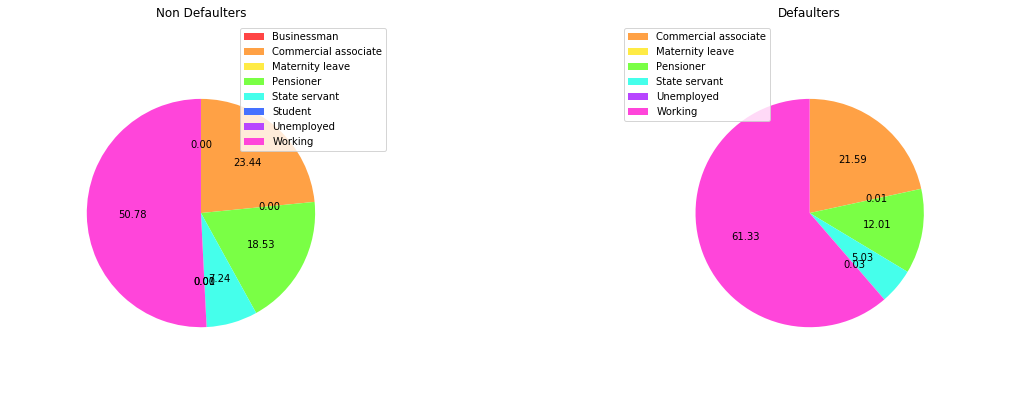

In [332]:
cat_variable = 'NAME_INCOME_TYPE'
types=sorted(list(app_df_trim[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = app_df1.groupby(cat_variable)['TARGET']\
                 .value_counts()\
                 .rename('Count')\
                 .mul(100)\
                 .reset_index()\
                 .sort_values(cat_variable)
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**We will now analyse the variable 'FLAG_OWN_CAR'. Let's plot a pie chart to see the distribution.**

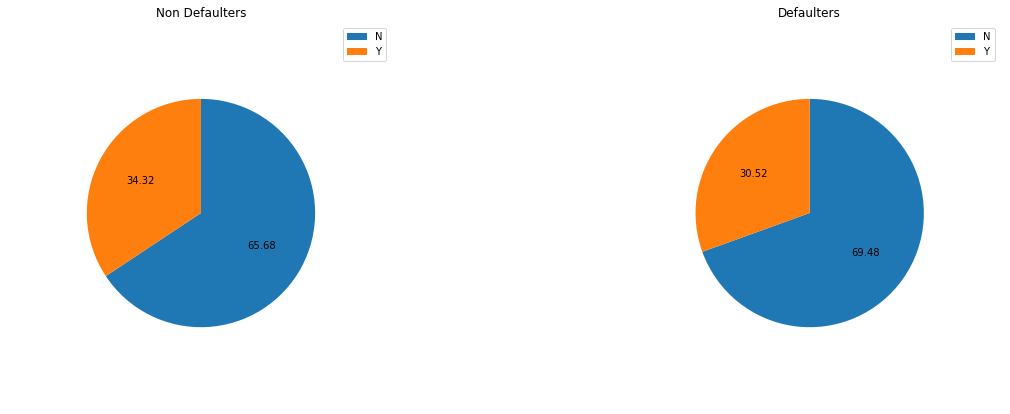

In [333]:
cat_variable = 'FLAG_OWN_CAR'
plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Percentage')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))
types = sorted(list(app_df[cat_variable].unique()))
plt.subplot(1, 2, 1)    
plt.pie(grp_df0['Percentage'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.title("Non Defaulters")
plt.legend(sorted(list(grp_df0[cat_variable].unique())))


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Percentage')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
plt.pie(grp_df1['Percentage'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.title("Defaulters")
plt.legend(sorted(list(grp_df1[cat_variable].unique())))
plt.show()


**We see that a higher percentage of people who owns cars are Non Dafulters. However, it may simply be that peopl;e who owns cars are financially in a better condition to replay the loan, and therefore while there is a correlation, it may not indicate causation.**

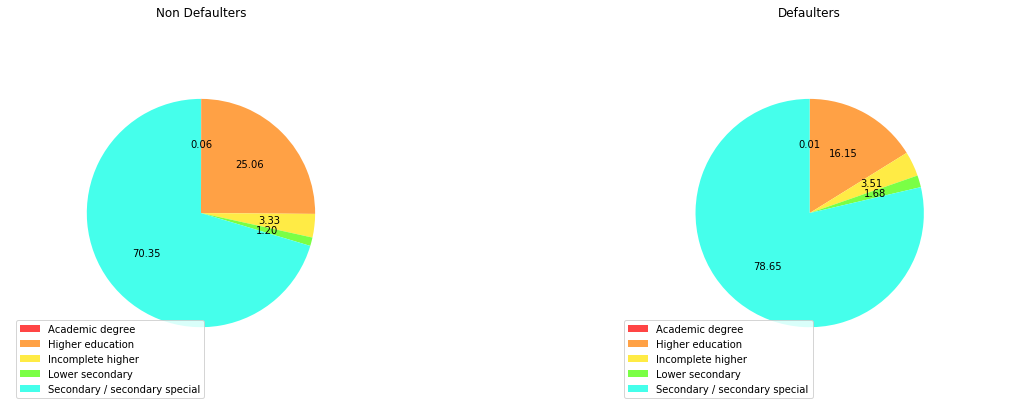

In [334]:
cat_variable = 'NAME_EDUCATION_TYPE'

types=sorted(list(app_df_trim[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = app_df1.groupby(cat_variable)['TARGET']\
                 .value_counts()\
                 .rename('Count')\
                 .mul(100)\
                 .reset_index()\
                 .sort_values(cat_variable)
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**Here we find that people with higher education are less likely to default on a loan, which seems to be linked to higher salary, and an inclination to maintain the credit rating, which is something we assume the less educated are not too much concerned about.**

**We move on to the 'NAME_FAMILY_STATUS' and take a look at the distribution.**

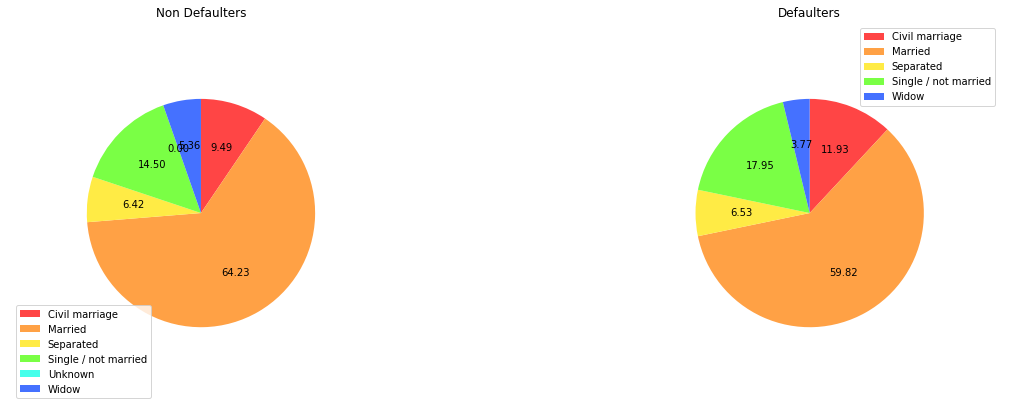

In [335]:
cat_variable = 'NAME_FAMILY_STATUS'
types=sorted(list(app_df_trim[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = app_df1.groupby(cat_variable)['TARGET']\
                 .value_counts()\
                 .rename('Count')\
                 .mul(100)\
                 .reset_index()\
                 .sort_values(cat_variable)
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**While there's not much difference across segments, we do see a trend that married people are less likely to default on a loan, and single people are more likely.**

**We will now look into the last categorical variable we are analysing in application data, 'WEEKDAY_APPR_PROCESS_START'.**

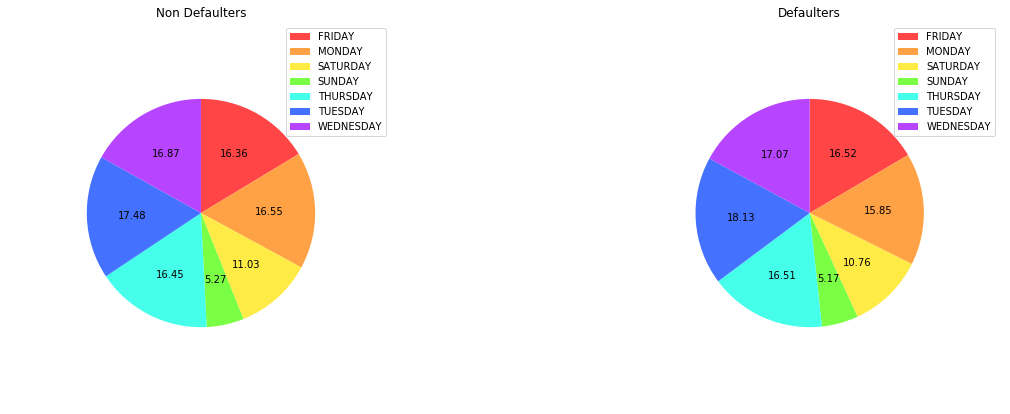

In [336]:
cat_variable = 'WEEKDAY_APPR_PROCESS_START'

types=sorted(list(app_df_trim[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = app_df1.groupby(cat_variable)['TARGET']\
                 .value_counts()\
                 .rename('Count')\
                 .mul(100)\
                 .reset_index()\
                 .sort_values(cat_variable)
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**We can clearly see that there is no correlation for this one between defaulters and Non Defaulters, the spread of the data is nearly identical over the two scenarios.**

## Correlation analysis for the numerical variables in Application Dataset

In [337]:
#num_variables = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', \
#                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
num_variables = ['AMT_INCOME_TOTAL',
                 'AMT_CREDIT',
                 'AMT_ANNUITY',
                 'AMT_GOODS_PRICE',
                 'REGION_POPULATION_RELATIVE',
                 'DAYS_REGISTRATION',
                 'EXT_SOURCE_2',
                 'DAYS_LAST_PHONE_CHANGE']

app_df0_num = app_df0[num_variables]
app_df1_num = app_df1[num_variables]

num_corr0 = app_df0_num.corr()
num_corr1 = app_df1_num.corr() 

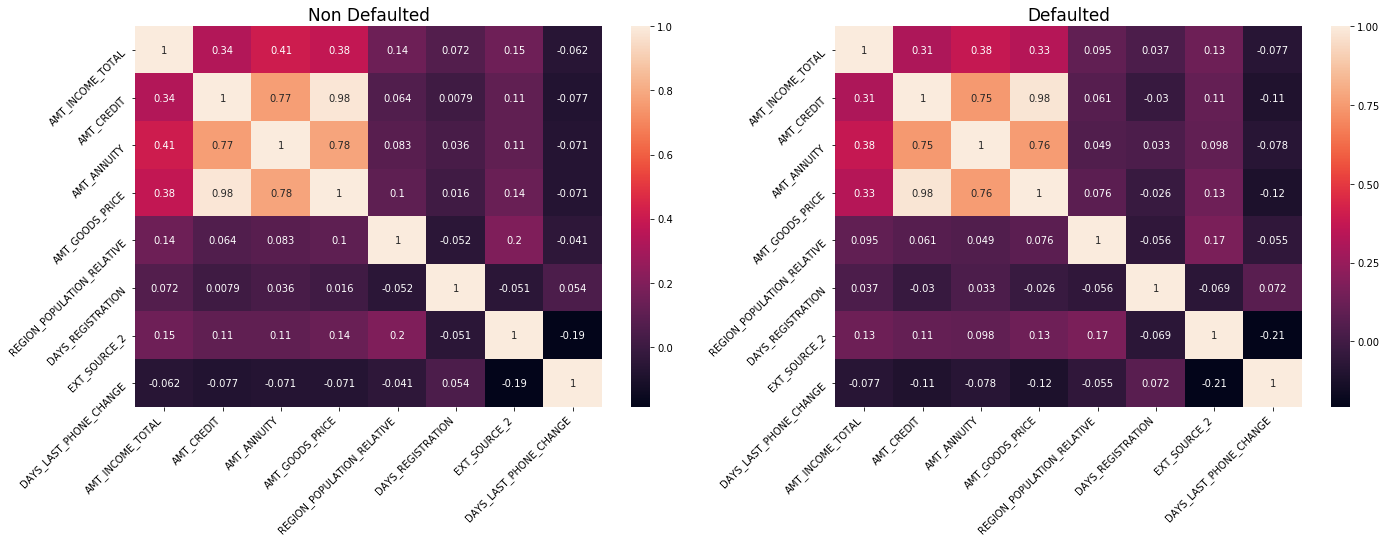

In [338]:
plt.figure(figsize=(23, 7))

plt.subplot(121)
sns.heatmap(data=num_corr0, annot=True)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Non Defaulted', fontsize=17)

plt.subplot(122)
sns.heatmap(data=num_corr1, annot=True)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Defaulted', fontsize=17)

plt.show() 

**We can clearly see that highest correleation is identical between Non Defaulters and Defaulters for all the numerical columns in both the datasets.**

## Univariate analysis for the numerical variables in Application Dataset

**We will now analyse the** <span style="color:#ff8226">**numerical variables**</span> **to find if there's any correlation between the variables and the probability of someone being a defaulter.**

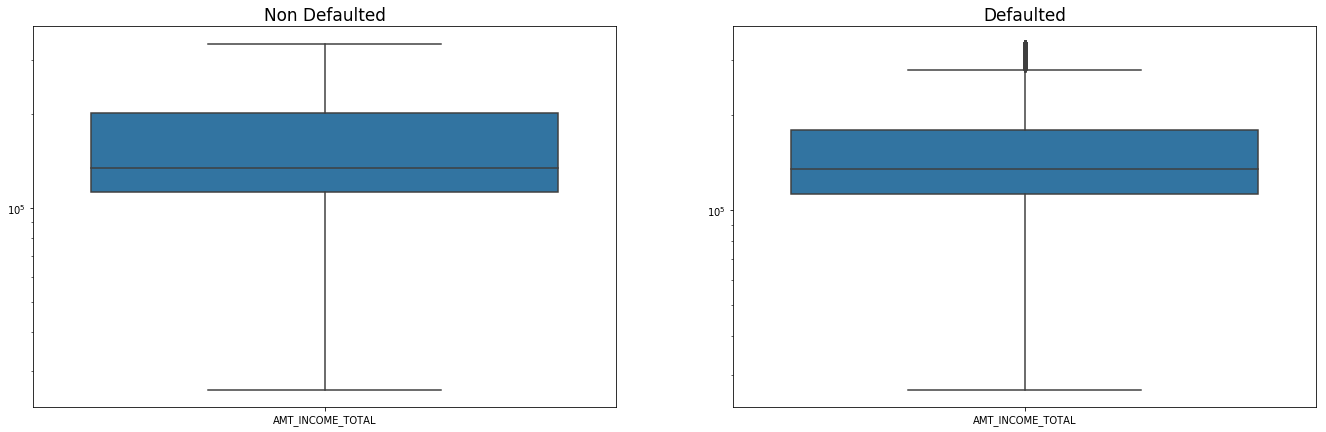

In [339]:
plt.figure(figsize=(23,7))
plt.subplot(121)
sns.boxplot(data=app_df0_num[['AMT_INCOME_TOTAL']])
plt.title('Non Defaulted', fontsize=17)
plt.yscale('log')

plt.subplot(122)
sns.boxplot(data=app_df1_num[['AMT_INCOME_TOTAL']])
plt.title('Defaulted', fontsize=17)
plt.yscale('log')
plt.show()

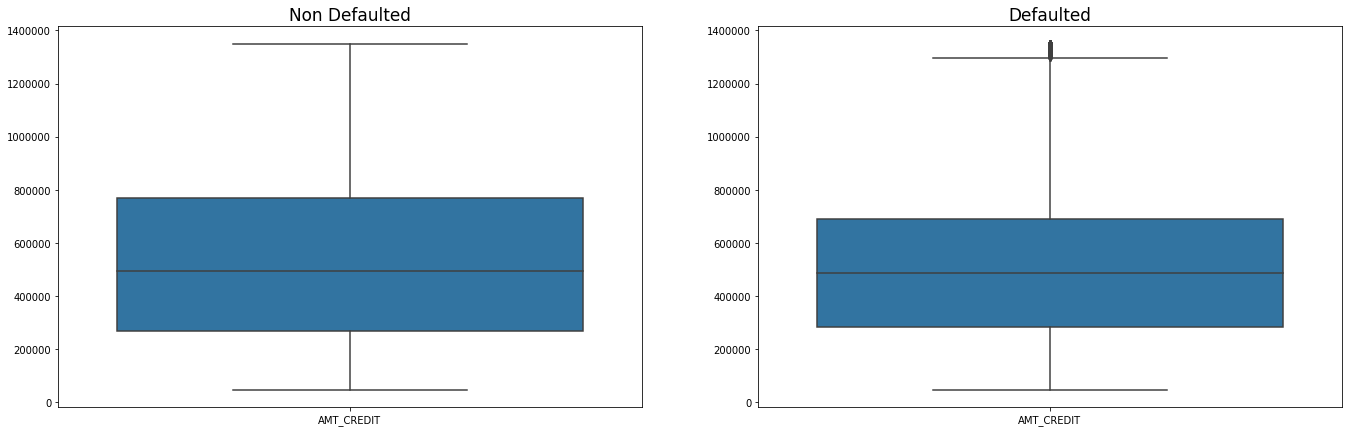

In [340]:
plt.figure(figsize=(23,7))
plt.subplot(121)
sns.boxplot(data=app_df0_num[['AMT_CREDIT']])
plt.title('Non Defaulted', fontsize=17)

plt.subplot(122)
sns.boxplot(data=app_df1_num[['AMT_CREDIT']])
plt.title('Defaulted', fontsize=17)
plt.show()

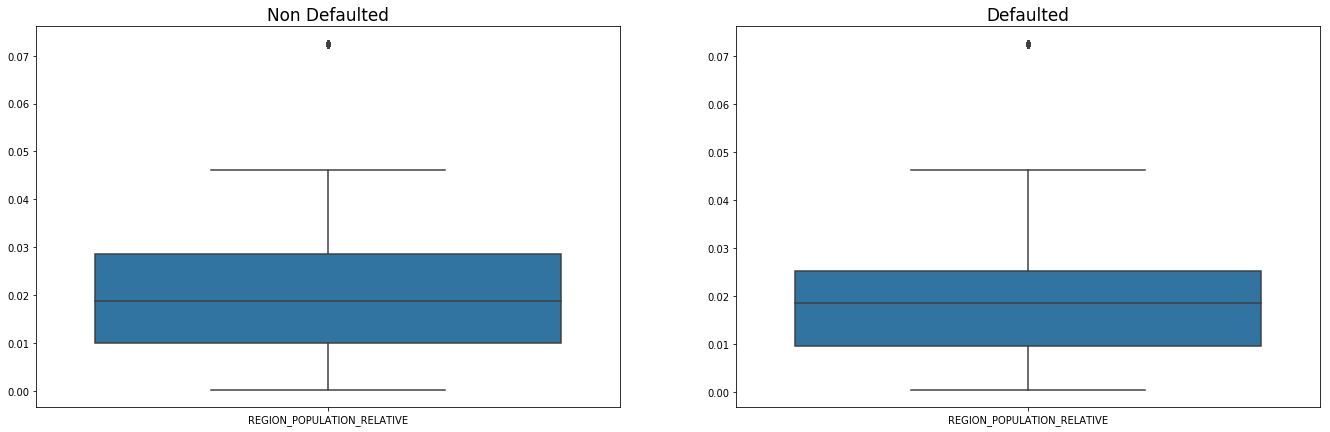

In [343]:
plt.figure(figsize=(23,7))
plt.subplot(121)
sns.boxplot(data=app_df0_num[['REGION_POPULATION_RELATIVE']])
plt.title('Non Defaulted', fontsize=17)

plt.subplot(122)
sns.boxplot(data=app_df1_num[['REGION_POPULATION_RELATIVE']])
plt.title('Defaulted', fontsize=17)
plt.show()

In [344]:
def bin_amounts(amt):
    amt_bins = {'5K' : (0, 5000), '50K': (5001, 50000), '200K' : (50000, 200000), '500K' : (200001, 500000), \
           '1M'  : (500001, 1000000), '5M' : (1000001, 5000000), '10M' : (5000001, 10000000), \
           '50M' : (10000001, 50000000), '100M' : (50000001, 100000000), '100M+' : (100000000, None)}
    for (bin_cat, bin_range) in amt_bins.items():
        if bin_range[1] == None:
            return bin_cat
        elif amt >= bin_range[0] and amt <= bin_range[1]:
            return bin_cat
    return 'NO Bin'
            

In [358]:
app_df0_num['AMT_CREDIT_BIN'] = app_df0_num.AMT_CREDIT.apply(bin_amounts)
app_df1_num['AMT_CREDIT_BIN'] = app_df1_num.AMT_CREDIT.apply(bin_amounts)
app_df0_num['AMT_INCOME_TOTAL_BIN'] = app_df0_num.AMT_INCOME_TOTAL.apply(bin_amounts)
app_df1_num['AMT_INCOME_TOTAL_BIN'] = app_df1_num.AMT_INCOME_TOTAL.apply(bin_amounts)

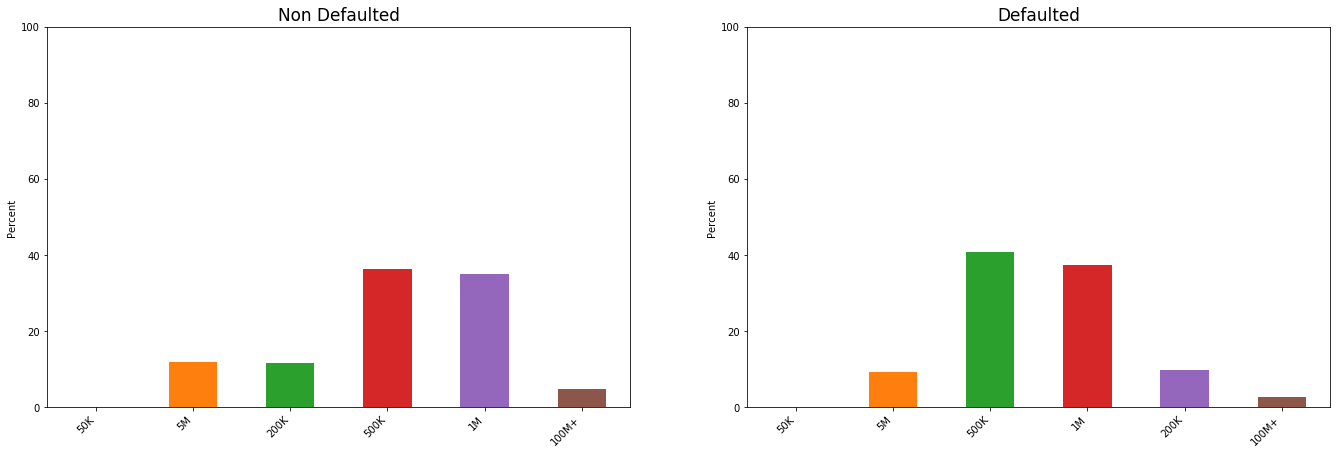

In [364]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0_num.AMT_CREDIT_BIN.value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
plt.title('Non Defaulted', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1_num.AMT_CREDIT_BIN.value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
plt.title('Defaulted', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

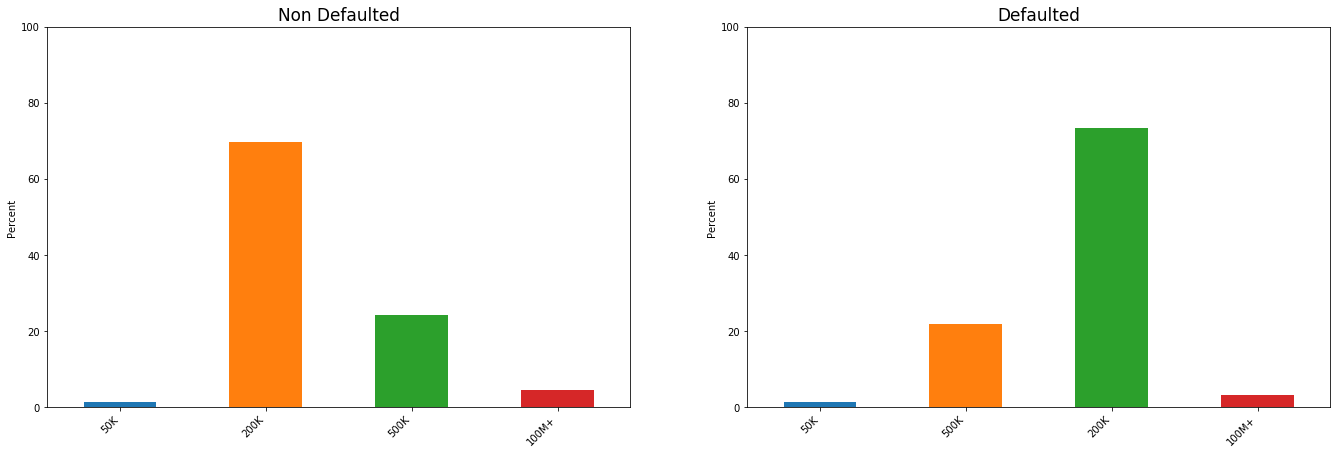

In [365]:
plt.figure(figsize=(23,7))
plt.subplot(121)

ax = (app_df0_num.AMT_INCOME_TOTAL_BIN.value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
plt.ylim(0, 100)
plt.title('Non Defaulted', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1_num.AMT_INCOME_TOTAL_BIN.value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
plt.title('Defaulted', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

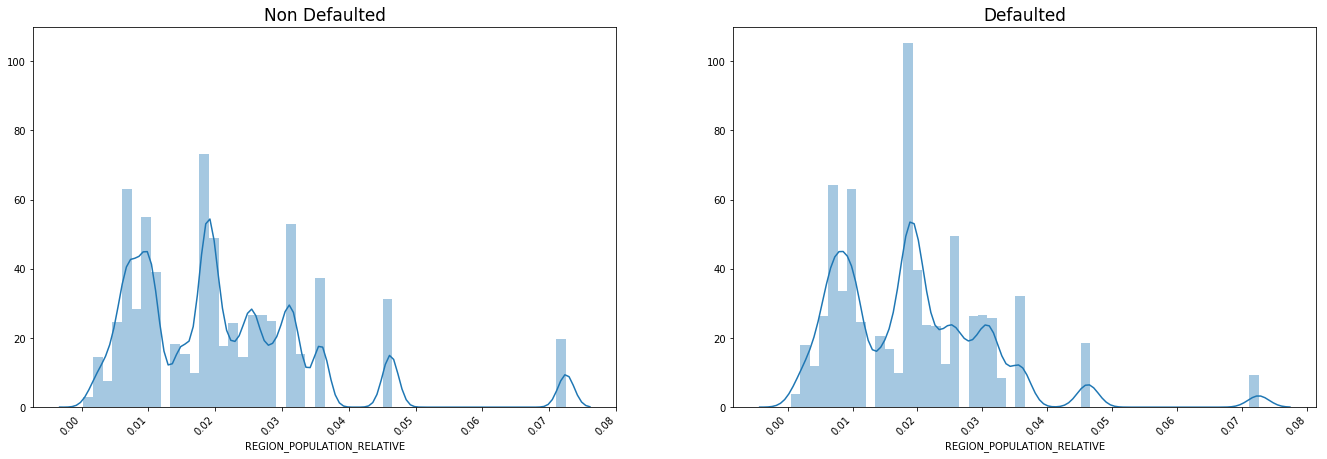

In [366]:
plt.figure(figsize=(23,7))
plt.subplot(121)
sns.distplot(app_df0_num['REGION_POPULATION_RELATIVE'])
plt.title('Non Defaulted', fontsize=17)
plt.ylim(0, 110)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 110)
sns.distplot(app_df1_num['REGION_POPULATION_RELATIVE'])
plt.title('Defaulted', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## Bivariate analysis for the numerical variables in Application Dataset

**We will plot a pair plot for the numerical columns in both the datasets. We will begin with the Non Defaulters.**

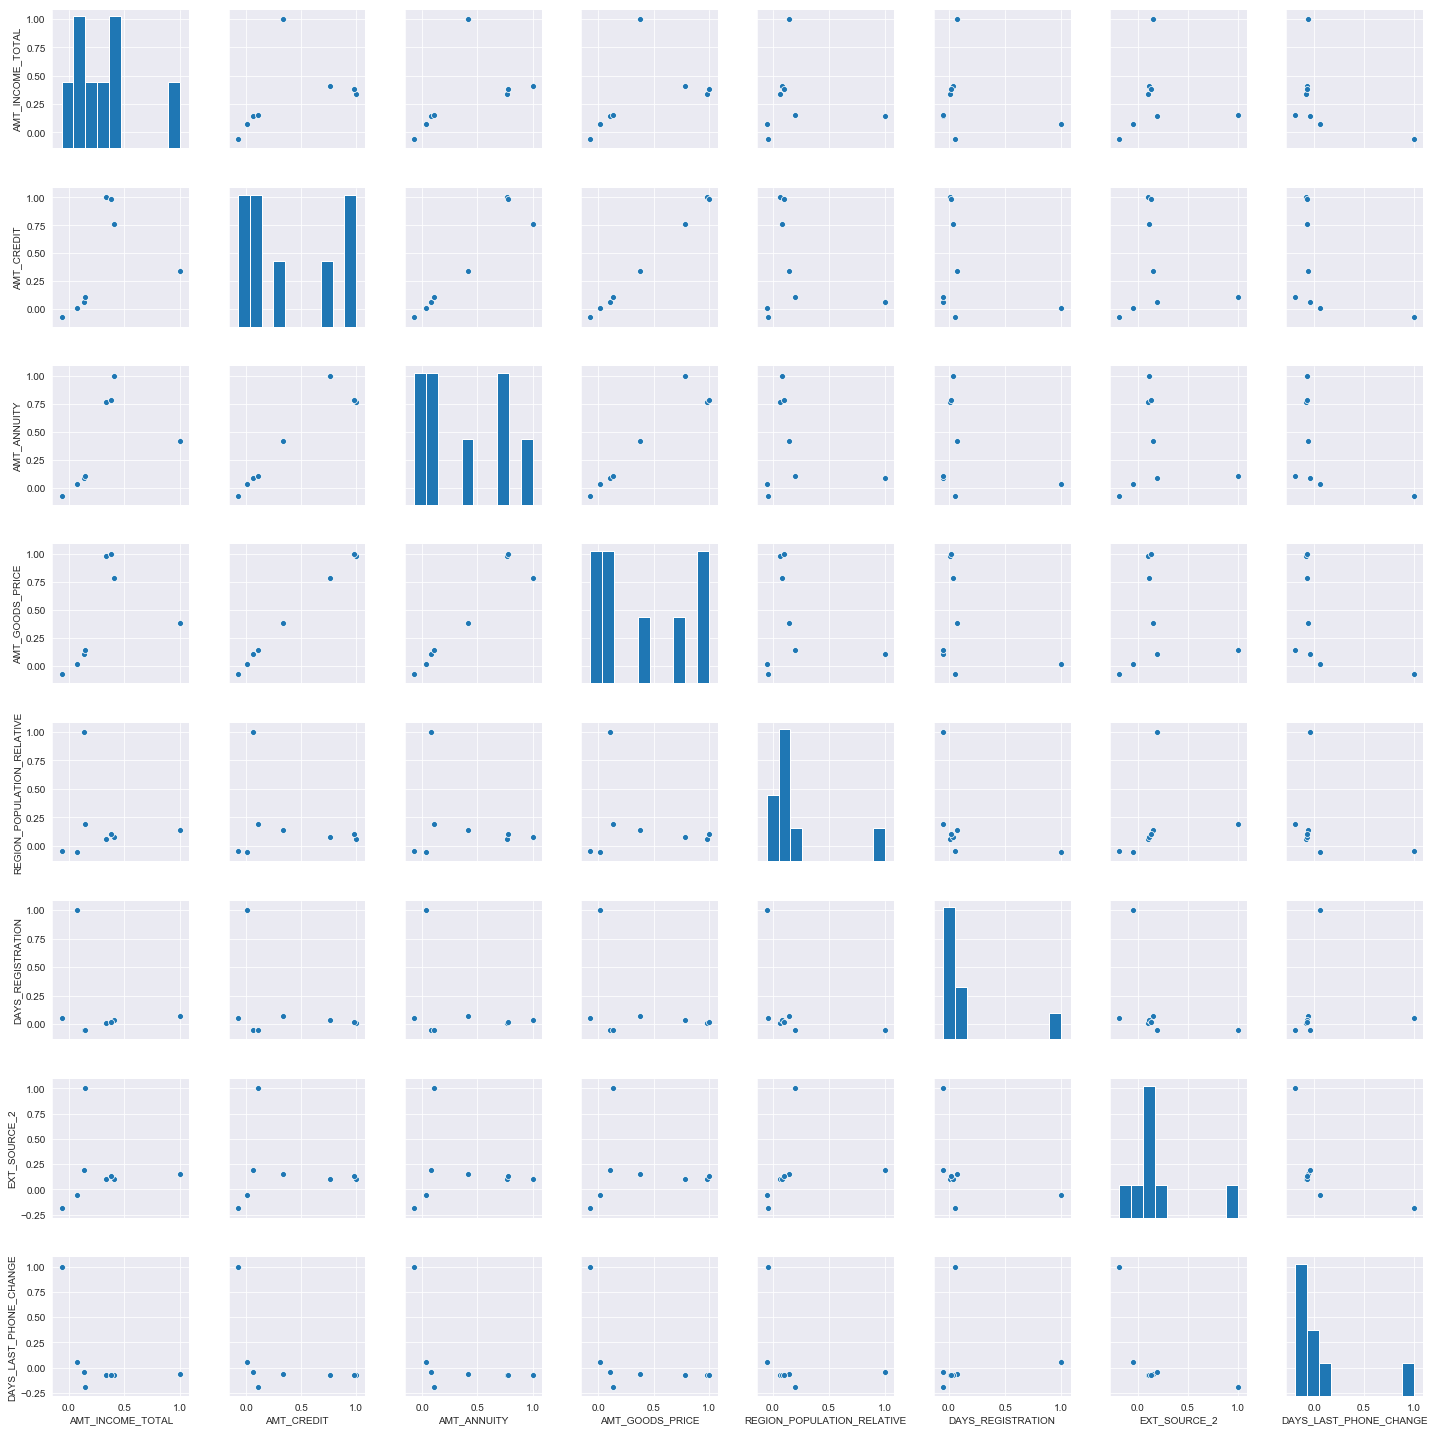

In [73]:
sns.pairplot(num_corr0)

**We can observe from this pair plot that AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE show a nearly perfect linear correlation amongst themselves.**

**Let's plot a pair plot for defaulters as well and see if there's any visible correlation.**

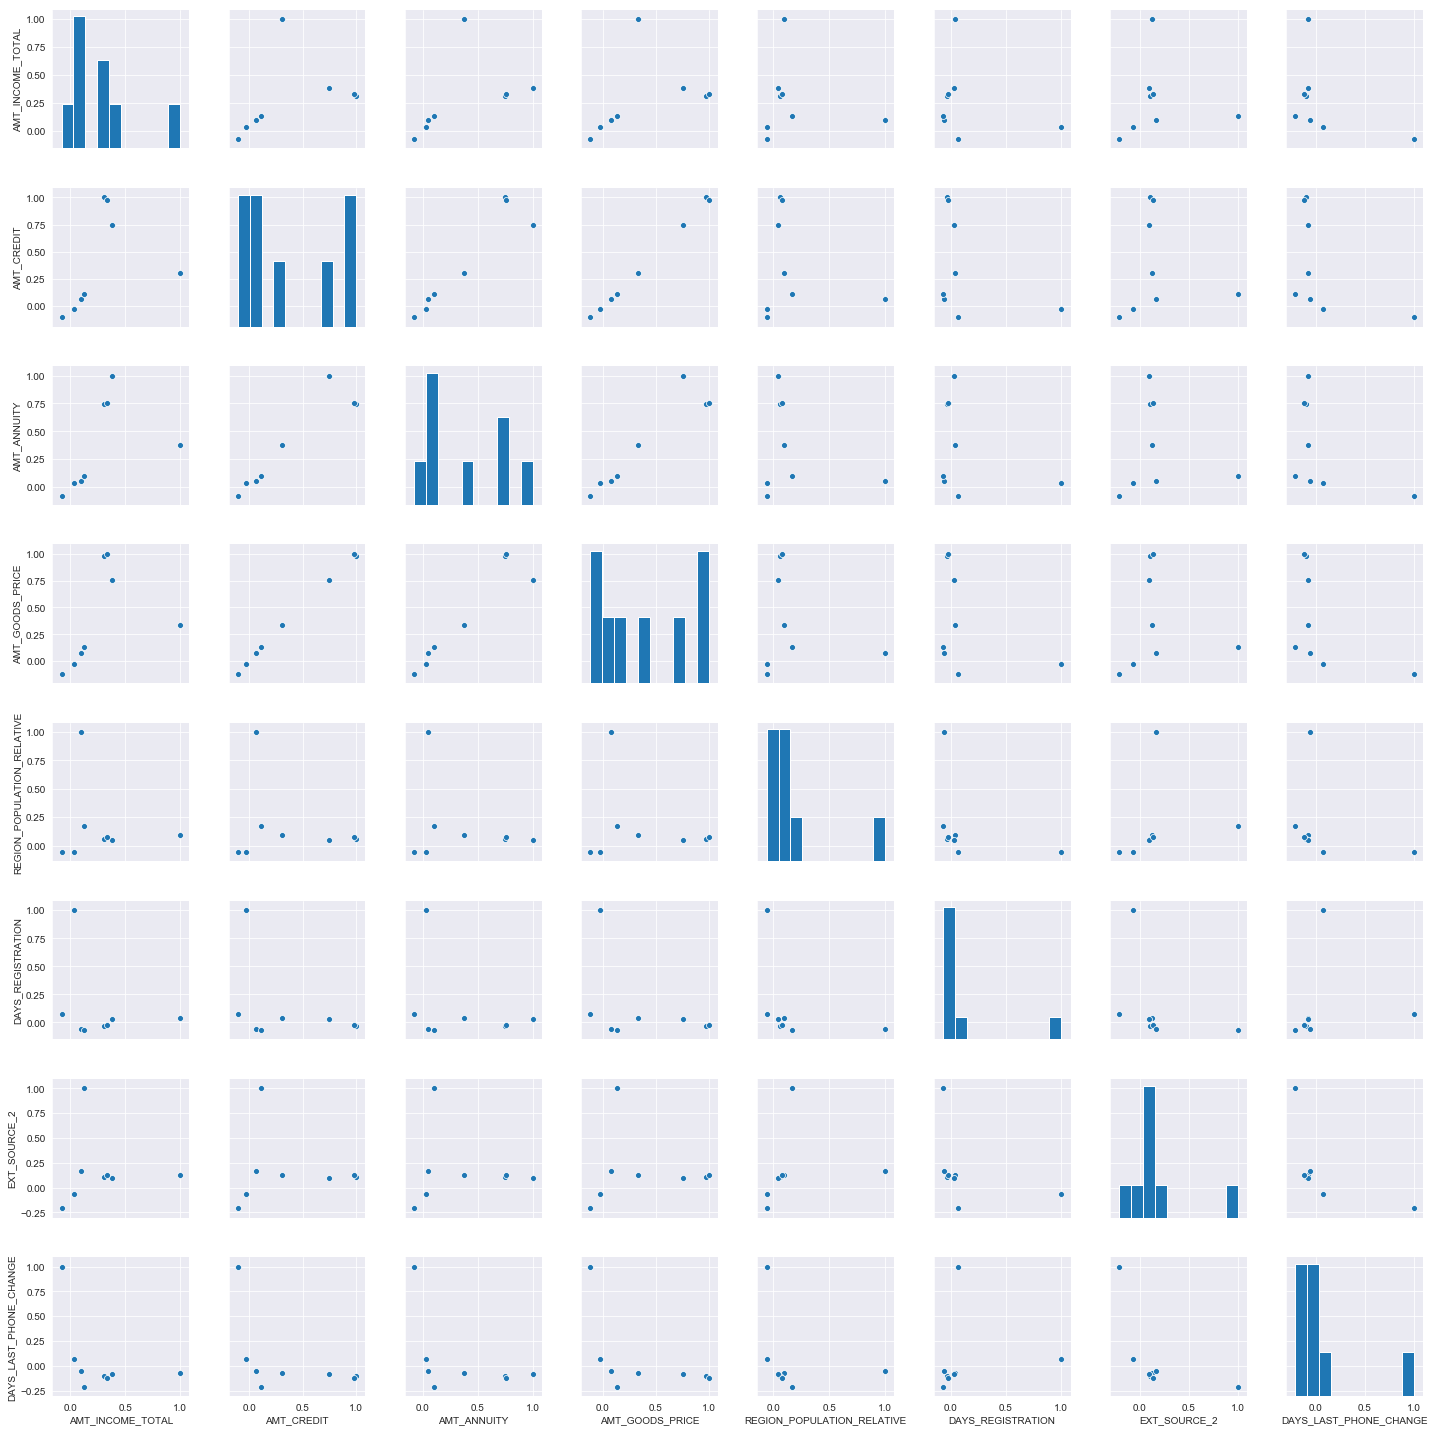

In [74]:
sns.pairplot(num_corr1)

**We can observe from this pair plot that the same three variables AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE show a nearly perfect linear correlation amongst themselves. Interesting to note that AMT_INCOME_TOTAL has an initially linear correlation with these 3 variables, and this correlation is certainly higher than the other dataset.**

In [375]:
prev_df=pd.read_csv('previous_application.csv')
desc_prev = prev_df.describe()

prev_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [376]:
prev_df_trim = prev_df.drop(columns=get_top_nulls(prev_df, .6))

prev_df_trim.info(null_counts=True)

                    0        1
0          SK_ID_PREV  1670214
1          SK_ID_CURR  1670214
2  NAME_CONTRACT_TYPE  1670214
3         AMT_ANNUITY  1297979
4     AMT_APPLICATION  1670214
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non

In [377]:
cat_variables=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',\
               'FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON',\
              'NAME_CLIENT_TYPE']


# Creating a bin based upon DAYS_DECISION

In [378]:
def day_bin(day):
    day = abs(day)
    slots = {0:'CAT0', 1:'CAT1', 2:'CAT2', 3:'CAT3', 4:'CAT4', 5:'CAT5', 6:'CAT6'}
    #slots = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6}
    return slots[int(day / 500)]

In [379]:
prev_df_trim['DAYS_DECISION_BIN'] = prev_df_trim.DAYS_DECISION.apply(day_bin)
print (prev_df_trim.DAYS_DECISION_BIN.value_counts())

CAT0    752287
CAT1    373894
CAT2    191921
CAT3    127975
CAT4    123410
CAT5    100727
Name: DAYS_DECISION_BIN, dtype: int64


In [380]:
# plt.figure(figsize=(20, 7))
# day_counts = (prev_df_trim.groupby(['WEEKDAY_APPR_PROCESS_START'])['SK_ID_CURR']
#                      .value_counts(normalize=True)
#                      .rename('Percentage')
#                      .mul(100)
#                      .reset_index()
#                      .sort_values('SK_ID_CURR'))
# sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="Percentage", hue="SK_ID_CURR", data=day_counts)
# * Not working well *

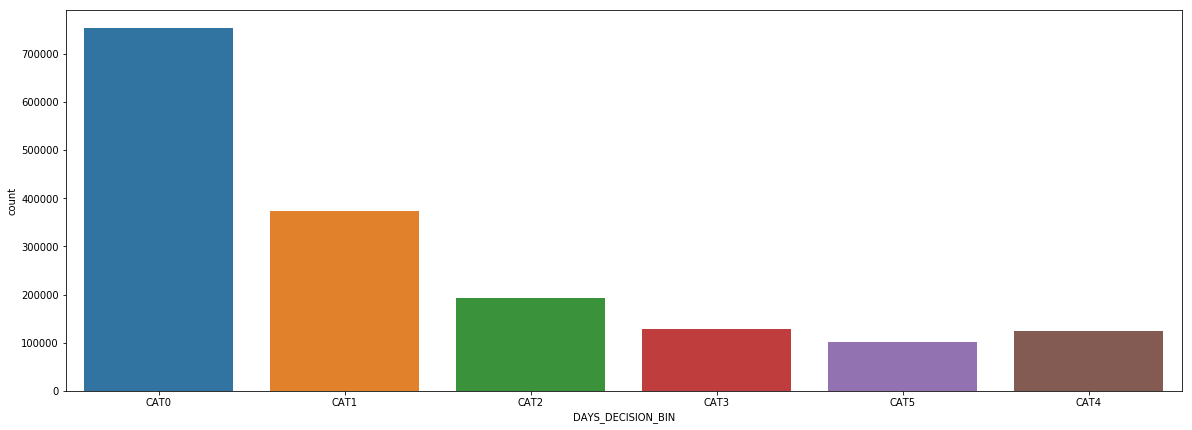

In [381]:
plt.figure(figsize=(20, 7))
sns.countplot(x="DAYS_DECISION_BIN", data=prev_df_trim)

Text(0.5, 1.0, 'Days distribution in Previous Data')

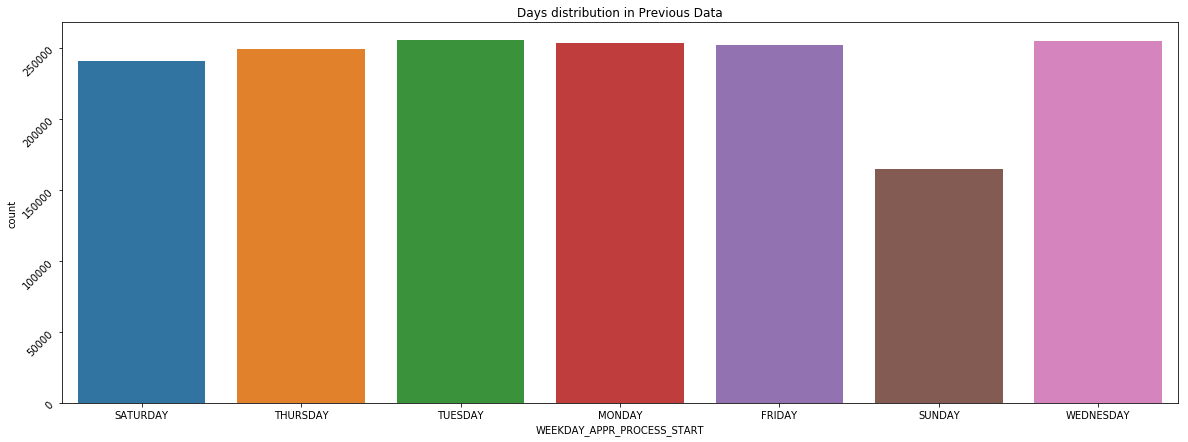

In [382]:
cat_variable  = 'WEEKDAY_APPR_PROCESS_START'

plt.figure(figsize=(20, 7))
#grp_df = (prev_df_trim.groupby([cat_variable])['SK_ID_CURR']
#                    .count()
#                    .rename('Count')
#                    .reset_index()
#                    .sort_values(cat_variable))    
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=prev_df_trim)
plt.yticks(rotation=45, horizontalalignment='right')
plt.title("Days distribution in Previous Data")
#plt.legend(sorted(list(grp_df[cat_variable].unique())))


Text(0.5, 1.0, 'Hour level distribution in Previous Data')

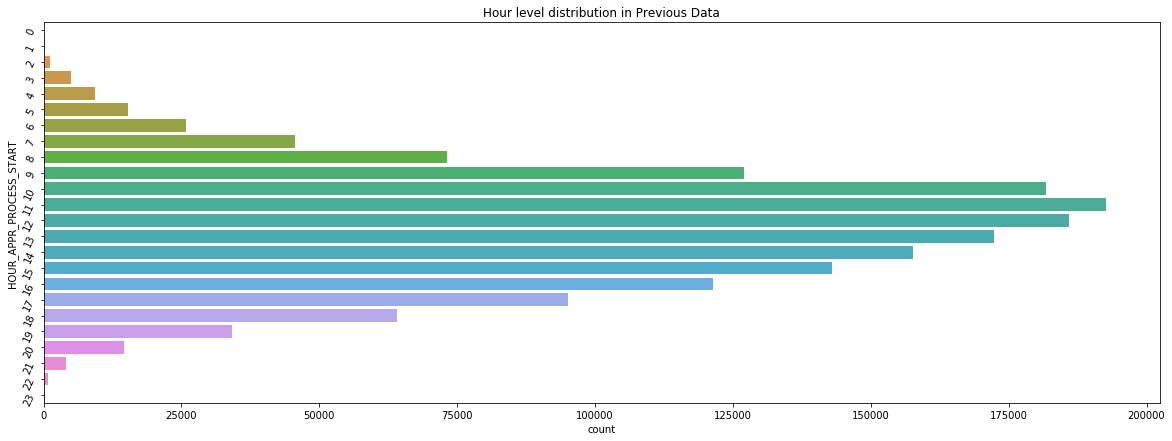

In [383]:
plt.figure(figsize=(20, 7))
#grp_df = (prev_df_trim.groupby([cat_variable])['SK_ID_CURR']
#                    .count()
#                    .rename('Count')
#                    .reset_index()
#                    .sort_values(cat_variable))    
sns.countplot(y='HOUR_APPR_PROCESS_START', data=prev_df_trim)
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Hour level distribution in Previous Data", fontsize=15)
#plt.legend(sorted(list(grp_df[cat_variable].unique())))
plt.show()

Text(0.5, 1.0, 'Last application per contract')

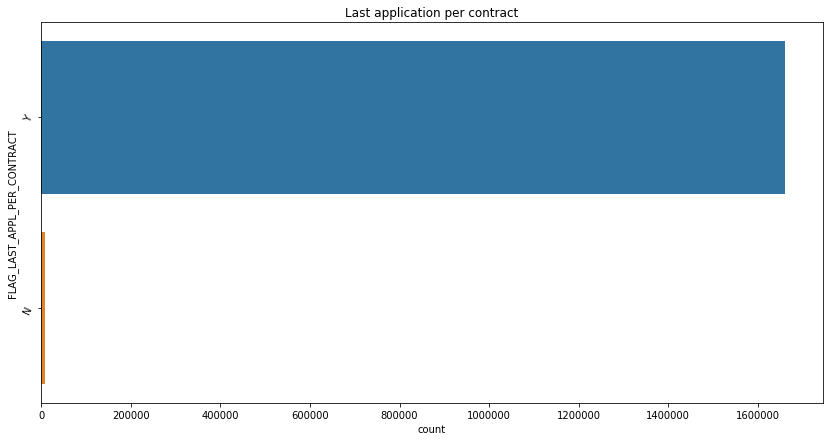

In [384]:
cat_variable  = 'FLAG_LAST_APPL_PER_CONTRACT'

plt.figure(figsize=(14, 7))
#grp_df = (prev_df_trim.groupby([cat_variable])['SK_ID_CURR']
#                    .count()
#                    .rename('Count')
#                    .reset_index()
#                    .sort_values(cat_variable))    
sns.countplot(y='FLAG_LAST_APPL_PER_CONTRACT', data=prev_df_trim)
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Last application per contract")
#plt.legend(sorted(list(grp_df[cat_variable].unique())))


In [385]:
prev_df_trim.loc[prev_df_trim.NAME_CASH_LOAN_PURPOSE.isin(['XAP', 'XNA']), 'NAME_CASH_LOAN_PURPOSE'] = None

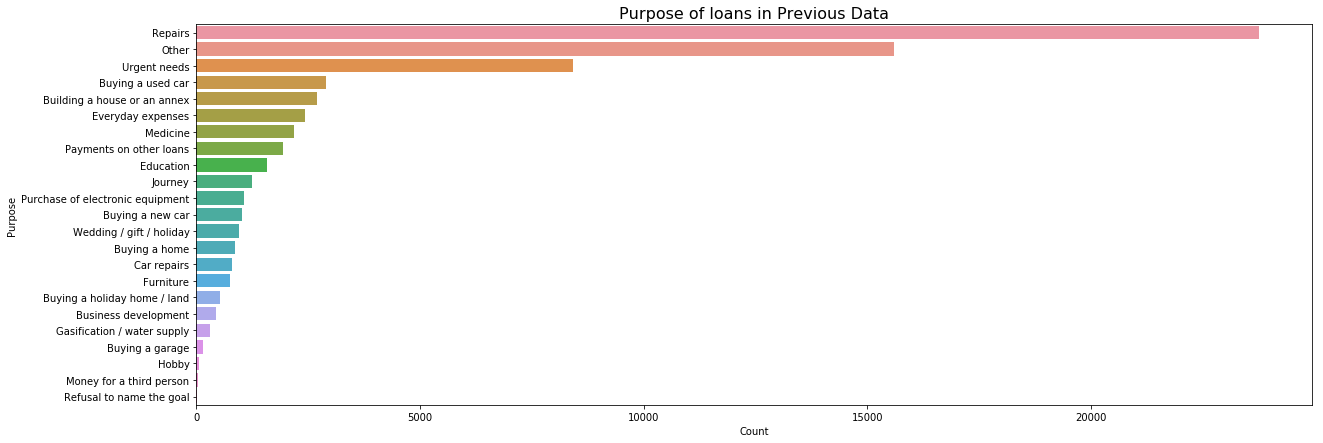

In [386]:
cat_variable  = 'NAME_CASH_LOAN_PURPOSE'

plt.figure(figsize=(20, 7))
grp_df=prev_df_trim.NAME_CASH_LOAN_PURPOSE.value_counts().reset_index()
grp_df.columns = ['Purpose', 'Count']
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
sns.barplot(x='Count', y='Purpose', data=grp_df)
#plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Purpose of loans in Previous Data", fontsize=16)
#plt.legend(sorted(list(grp_df[cat_variable].unique())))
plt.show()

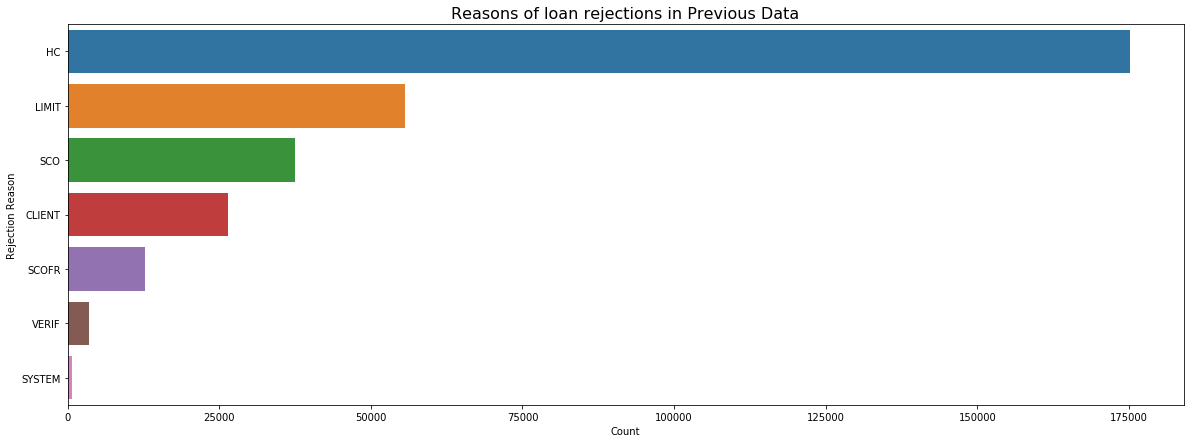

In [387]:
cat_variable  = 'CODE_REJECT_REASON'
prev_df_trim.loc[prev_df_trim[cat_variable].isin(['XAP', 'XNA']), cat_variable] = None

plt.figure(figsize=(20, 7))
grp_df=prev_df_trim[cat_variable].value_counts().reset_index()
grp_df.columns = ['Rejection Reason', 'Count']
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
sns.barplot(x='Count', y='Rejection Reason', data=grp_df)
#plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Reasons of loan rejections in Previous Data", fontsize=16)
#plt.legend(sorted(list(grp_df[cat_variable].unique())))
plt.show()


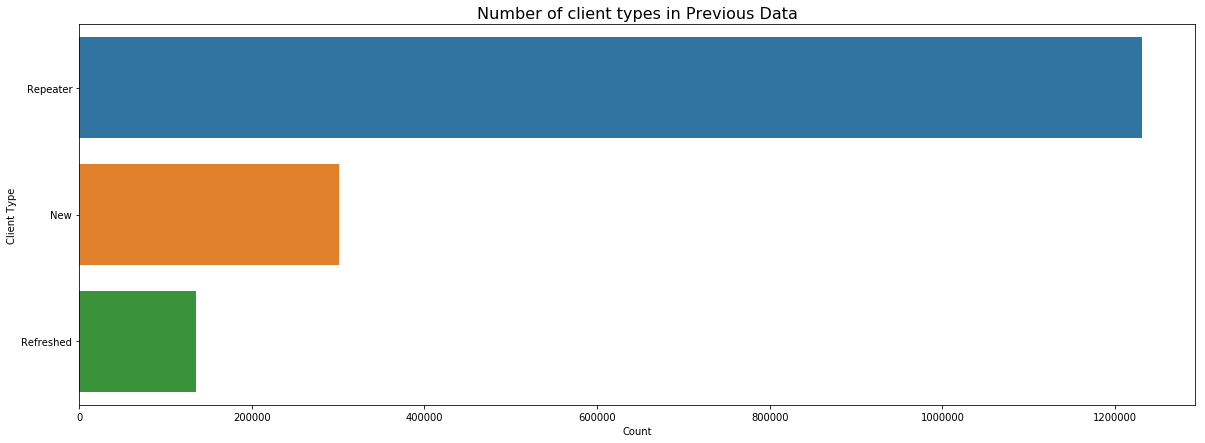

In [388]:
cat_variable  = 'NAME_CLIENT_TYPE'

prev_df_trim.loc[prev_df_trim[cat_variable].isin(['XAP', 'XNA']), cat_variable] = None

plt.figure(figsize=(20, 7))
grp_df=prev_df_trim[cat_variable].value_counts().reset_index()
grp_df.columns = ['Client Type', 'Count']
#plt.pie(grp_df['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
sns.barplot(x='Count', y='Client Type', data=grp_df)
#plt.yticks(rotation=65, horizontalalignment='right')
plt.title("Number of client types in Previous Data", fontsize=16)
#plt.legend(sorted(list(grp_df[cat_variable].unique())))
plt.show()


In [389]:
top_corr_prev=(prev_df_trim
                    .corr()
                    .abs()
                    .unstack()
                    .sort_values(ascending=False)
                    .drop_duplicates()
                    .head(11)
                    .tail(10).reset_index())

print ("Top correlations in Previous data")
print(top_corr_prev)

Top correlations in Previous data
              level_0                    level_1         0
0     AMT_APPLICATION            AMT_GOODS_PRICE  0.999884
1          AMT_CREDIT            AMT_GOODS_PRICE  0.993087
2     AMT_APPLICATION                 AMT_CREDIT  0.975824
3       DAYS_LAST_DUE           DAYS_TERMINATION  0.927990
4         AMT_ANNUITY            AMT_GOODS_PRICE  0.820895
5         AMT_ANNUITY                 AMT_CREDIT  0.816429
6     AMT_APPLICATION                AMT_ANNUITY  0.808872
7  DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION  0.803494
8         CNT_PAYMENT            AMT_APPLICATION  0.680630
9         CNT_PAYMENT                 AMT_CREDIT  0.674278


In [390]:
num_variables = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']

prev_df_num = prev_df[num_variables]
prev_num_corr = prev_df_num.corr()


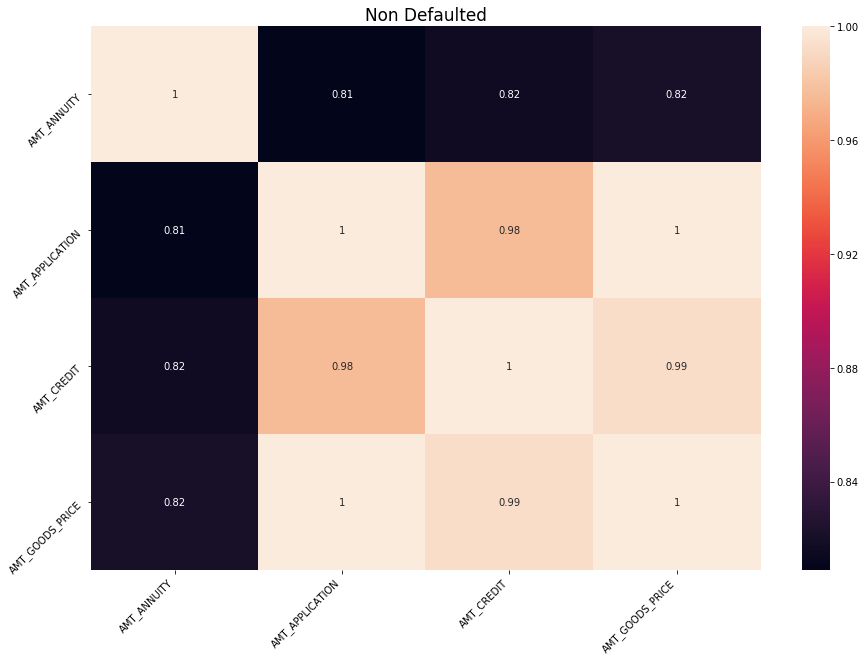

In [391]:
plt.figure(figsize=(15, 10))

sns.heatmap(data=prev_num_corr, annot=True)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Non Defaulted', fontsize=17)

plt.show()

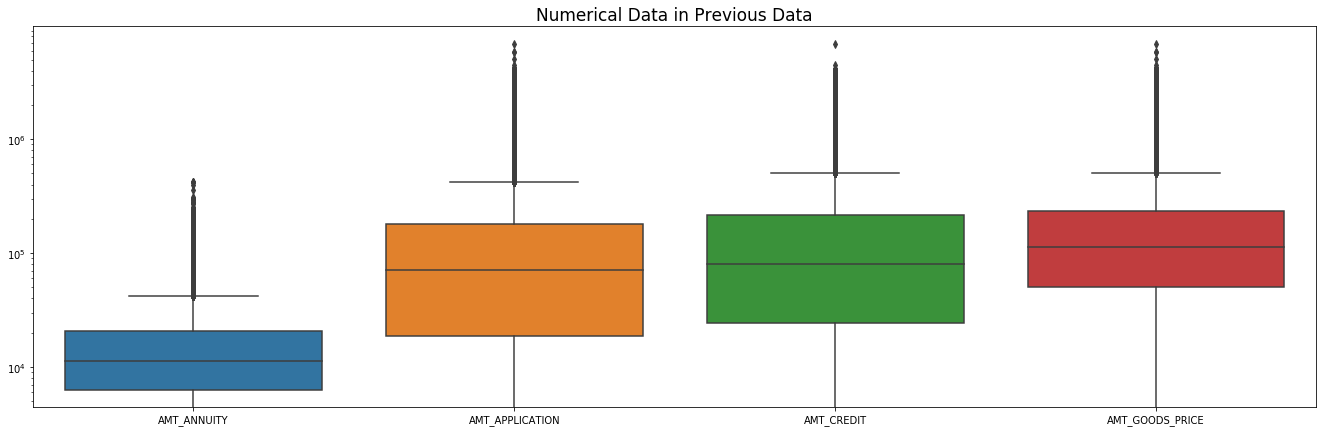

In [392]:
plt.figure(figsize=(23,7))
sns.boxplot(data=prev_df_num)
plt.title('Numerical Data in Previous Data', fontsize=17)
plt.yscale('log')


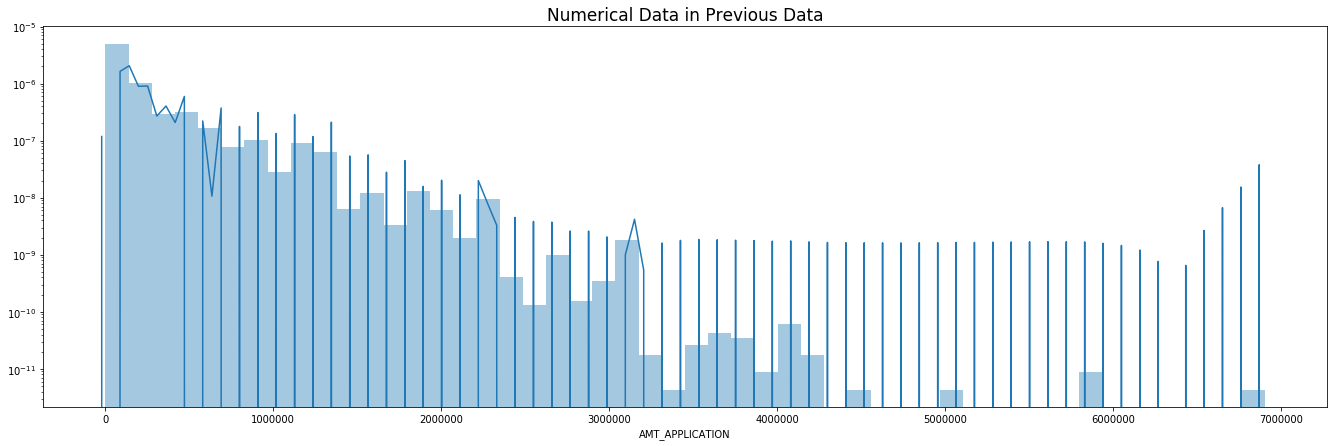

In [393]:
plt.figure(figsize=(23,7))
sns.distplot(prev_df_num[num_variables[1]])
plt.title('Numerical Data in Previous Data', fontsize=17)
plt.yscale('log')


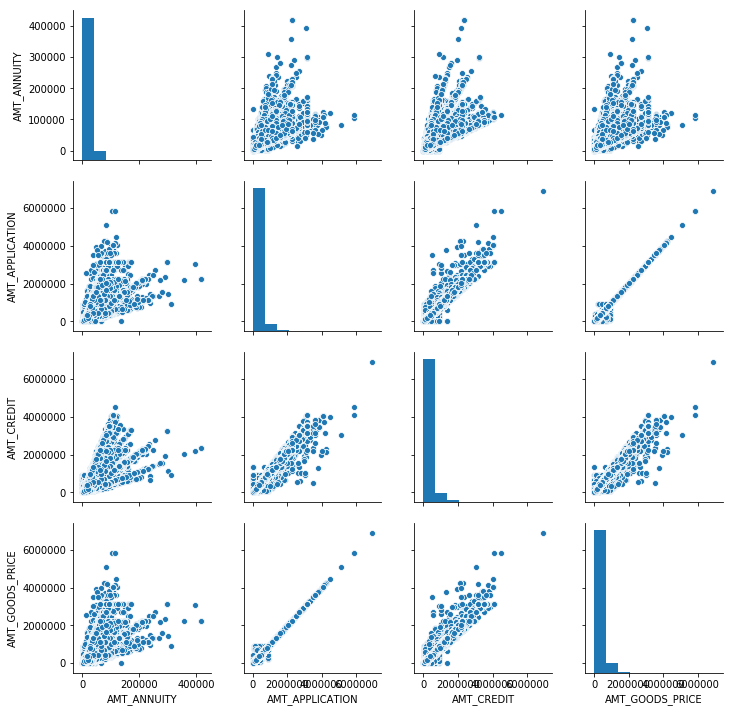

In [394]:
sns.pairplot(prev_df_num)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()